In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
data = pd.read_excel(r'indeed_results_pp_2020-04-25.xlsx')

In [3]:
data.head()

,Title,Location,Company,Salary,Sponsored,Description,Time,Salary_Unit_Month,Salary_Unit_Year,Salary_Unit_Week,...,Education_Bachelors,Education_Masters,Education_Doctorate,Skills_Description,Skills_Title,Skills,Position_Junior,Position_Senior,Internship,Title_New
0,delivery drivers delivery executives delivery ...,Guwahati,Ride Swiggy,25000 35000 month,Sponsored,official job posted from swiggy join swiggy fa...,2019-11-15,1,0,0,...,0,0,0,NaN,NaN,NaN,0,0,1,NaN
1,primary teacher relocation to chitrakoot up,Guwahati,Ashok Public School Chitrakoot UP,NaN,Sponsored,candidates who are willing to relocate at chit...,2020-02-06,0,0,0,...,1,0,0,NaN,NaN,NaN,0,0,0,NaN
2,graphic designer,Guwahati,Supermark Agency,15000 20000 month,Sponsored,the ideal candidate will have strong creative ...,2020-01-18,1,0,0,...,1,0,0,|ui|ux|css,NaN,ui|css|ux,0,0,0,graphic designer
3,sales executive kitchenware and utensils,Guwahati,Global Prospects,175000 250000 year,Organic,sales executive distributor payroll we are urg...,2020-02-22,0,1,0,...,1,0,0,NaN,NaN,NaN,0,0,0,NaN
4,digital marketing executive,Guwahati,Global Prospects,100000 150000 year,Organic,we are looking for passionate and aspiring you...,2019-12-30,0,1,0,...,1,0,0,|communication skills,NaN,communication skills,0,0,0,NaN


In [4]:
data['Company'].value_counts().head(10)

Study com                                1009
CommScope                                 761
Capgemini                                 708
Mphasis                                   503
TSYS                                      469
Deutsche Bank                             438
HDFC Bank                                 407
Whitehat Education Technology Pvt Ltd     256
Alila Hotels                              252
Accenture                                 248
Name: Company, dtype: int64

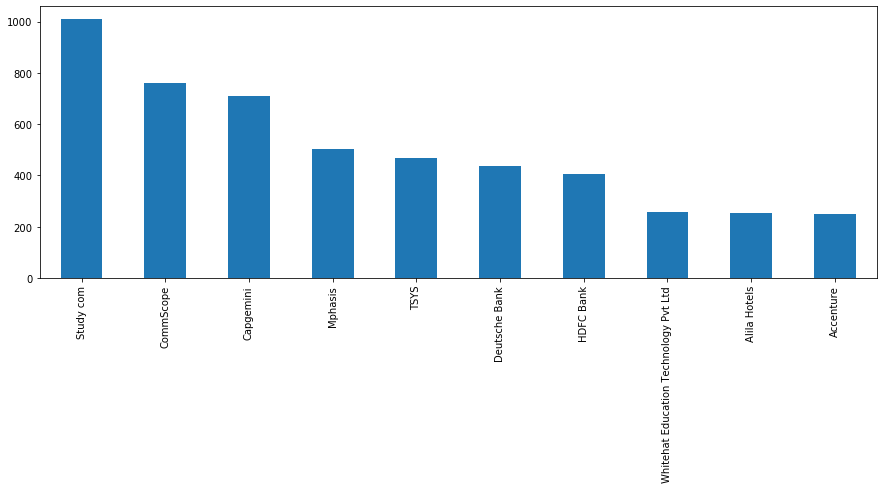

In [5]:
Cf,ax=plt.subplots(figsize=(15,5))
data['Company'].value_counts().head(10).plot(kind = 'bar')

In [6]:
data['Skills_Title'].value_counts().head(10)

|soft skills         1674
|python               488
|machine learning     441
|front end            404
|java                 404
|big data             341
|sql                  325
|php                  279
|.net                 171
|react native         144
Name: Skills_Title, dtype: int64

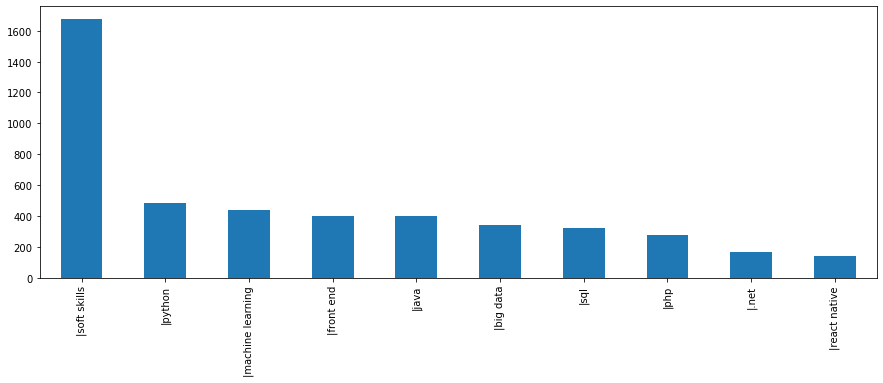

In [7]:
f,ax=plt.subplots(figsize=(15,5))
data['Skills_Title'].value_counts().head(10).plot(kind = 'bar')

In [8]:
data['Title_New'].value_counts().head(10)

software developer            1570
graphic designer               852
front end developer            744
data scientist                 603
system admin                   458
data engineer                  393
web developer                  330
full stack developer           252
back end developer             235
machine learning developer     218
Name: Title_New, dtype: int64

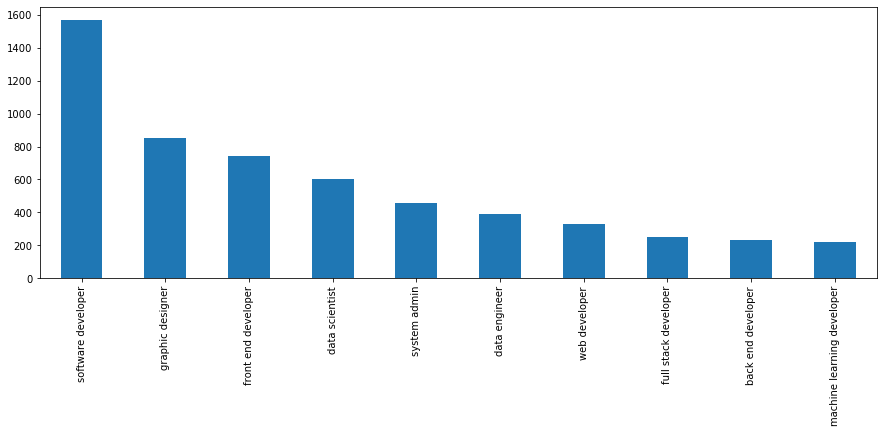

In [9]:
f,ax=plt.subplots(figsize=(15,5))
data['Title_New'].value_counts().head(10).plot(kind = 'bar')

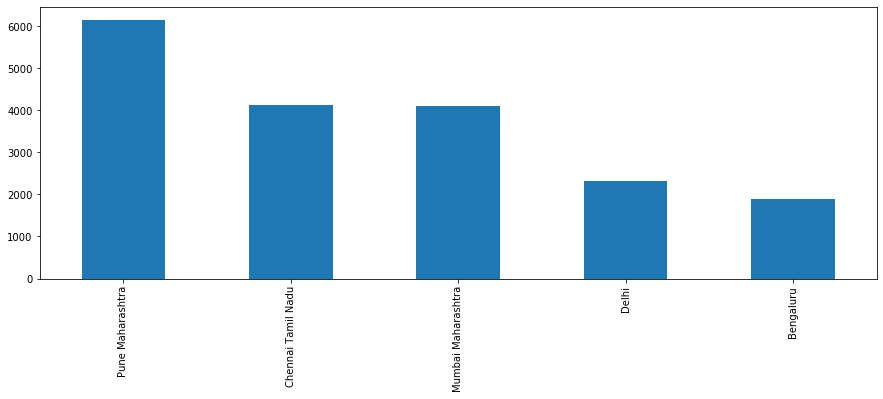

In [10]:
most_job_posting_city=data['Location'].value_counts().head()
f ,ax=plt.subplots(figsize=(15,5))
most_job_posting_city.plot(kind = 'bar')

In [11]:
pay_split = data['Salary'].str[1:-1].str.split('-', expand=True)
pay_split.head()

,0
0,5000 35000 mont
1,NaN
2,5000 20000 mont
3,75000 250000 yea
4,00000 150000 yea


In [12]:
pay_split[0] =  pay_split[0].str.strip()

#remove comma
pay_split[0] = pay_split[0].str.replace(',', '')

pay_split[0] = pay_split[0].str.replace(r'\D.*', '') 
pay_split[0].head()

0     5000
1      NaN
2     5000
3    75000
4    00000
Name: 0, dtype: object

In [13]:
#data.head()

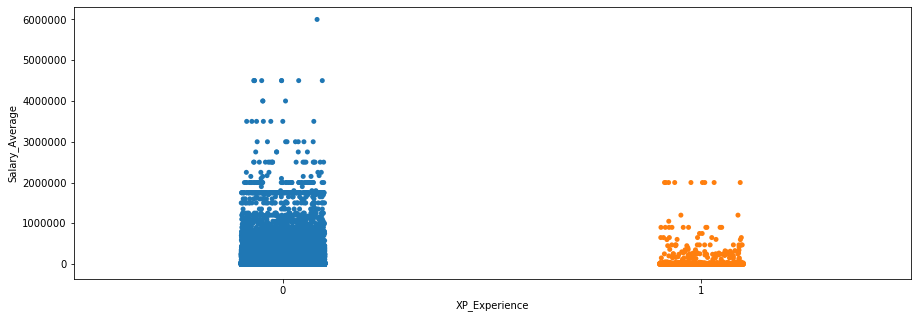

In [14]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='XP_Experience', y='Salary_Average', data=data, jitter=True)

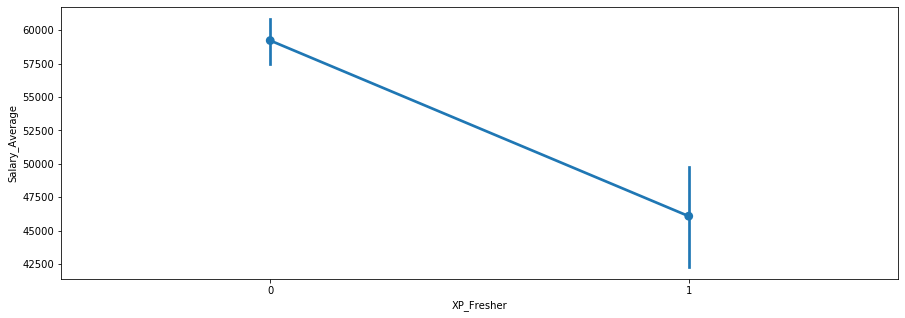

In [15]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='XP_Fresher', y='Salary_Average', data=data)

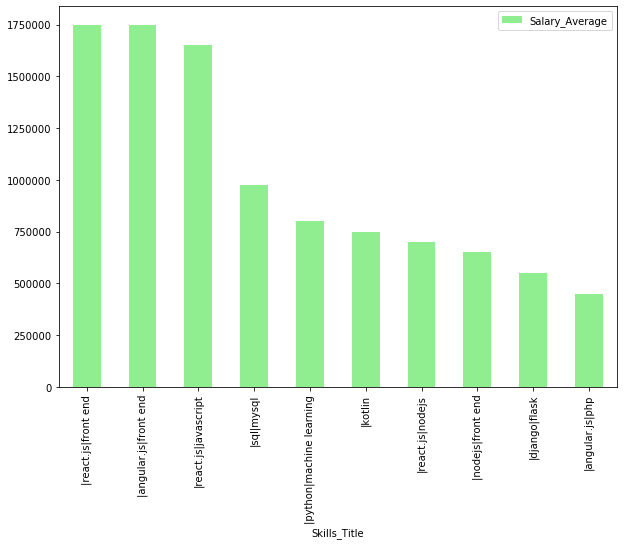

In [17]:
data[['Salary_Average','Skills_Title']].groupby(["Skills_Title"]).median().sort_values(by='Salary_Average',ascending=False).head(10).plot.bar(color='lightgreen')

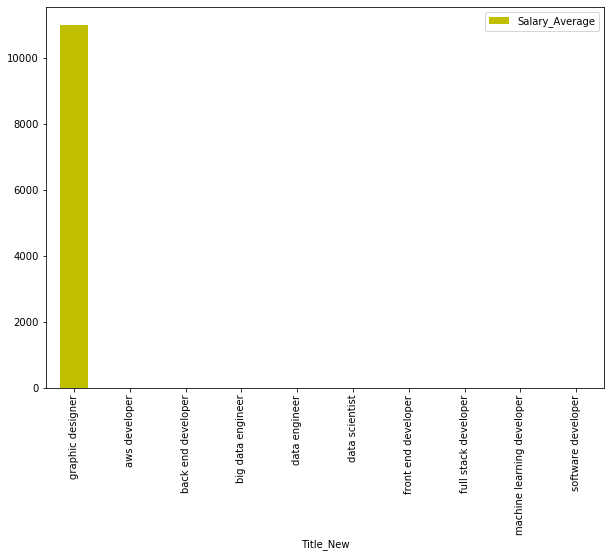

In [18]:
data[['Salary_Average','Title_New']].groupby(["Title_New"]).median().sort_values(by='Salary_Average',ascending=False).head(10).plot.bar(color='y')

In [20]:
#sns.jointplot(x='XP_Experience', y='Salary_Average', data=data, 
              #kind="kde",xlim={0,15}, ylim={0,1000000})

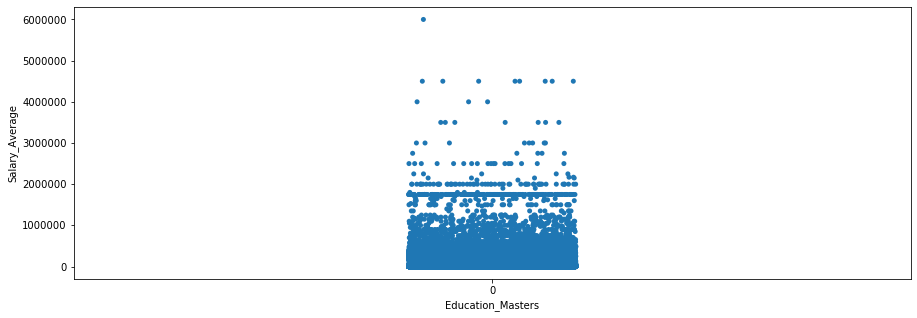

In [22]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='Education_Masters', y='Salary_Average', data=data, jitter=True)

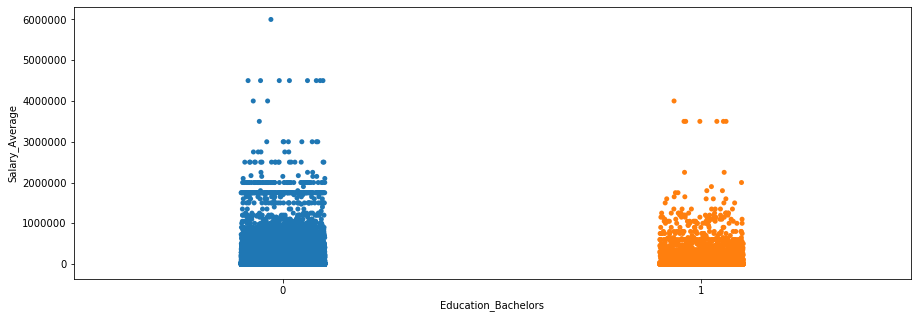

In [23]:
f,ax=plt.subplots(figsize=(15,5))

sns.stripplot(x='Education_Bachelors', y='Salary_Average', data=data, jitter=True)

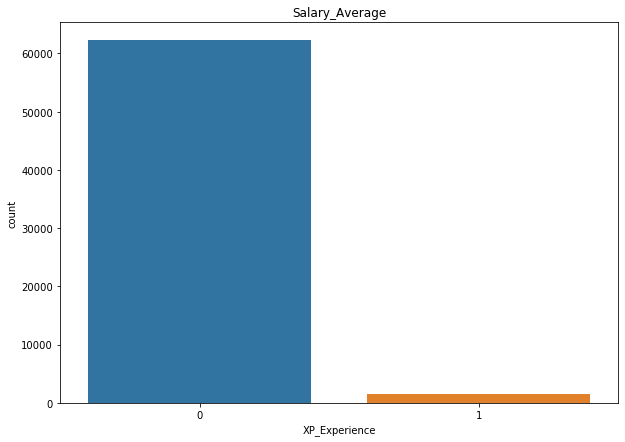

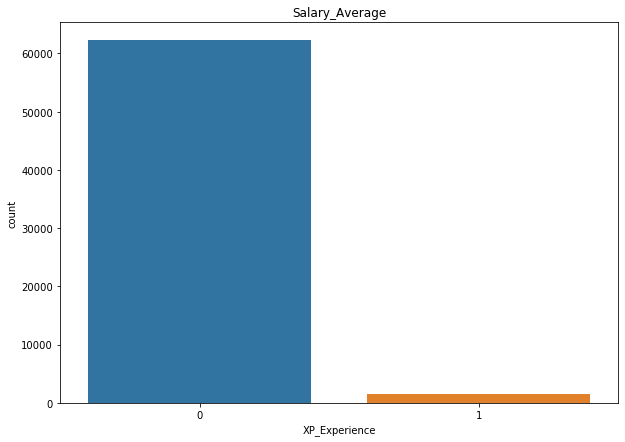

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [26]:
from scipy.stats import norm
import seaborn as sns
sns.countplot(data['XP_Experience']).set_title('Salary_Average')
plt.show()
sns.countplot(data['XP_Experience']).set_title('Salary_Average')
plt.show()
plt.figure(figsize=(10,6))

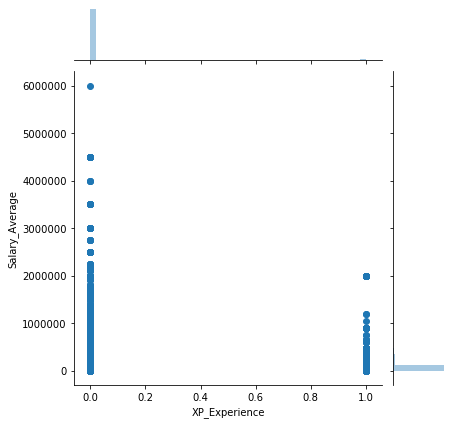

In [28]:
sns.jointplot(data['XP_Experience'],data['Salary_Average'])